# Identifying Vada Paav

In [0]:
import os
import cv2
import numpy as np
import keras
import tensorflow as tf

from keras.utils import np_utils

import matplotlib.pyplot as plt
%matplotlib inline
from keras import backend as K
K.set_image_dim_ordering('tf')

from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,adam
print(keras.__version__)
from keras.utils.vis_utils import plot_model
print("Done")

c:\users\hp\appdata\local\programs\python\python35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


2.1.6
Done


c:\users\hp\appdata\local\programs\python\python35\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Loading the Datasets

In [0]:
PATH = os.getcwd()
data_path = PATH + '/ddata1'
data_dir_list = os.listdir(data_path)
img_data_list=[]
for dataset in data_dir_list:
	img_list=os.listdir(data_path+'/'+ dataset)
	print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
	for img in img_list:
		input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img)
		input_img_resize=cv2.resize(input_img,(128,128))         
		img_data_list.append(input_img_resize)

Loaded the images of dataset-Others

Loaded the images of dataset-vada



# Data Preprocesssing


*   Converting Images to array
*   Convering to Float
*   Divide by 255

In [0]:
img_data = np.array(img_data_list)    
img_data = img_data.astype('float32') 
img_data /= 255                         
print (img_data.shape)
print("DONE")

(550, 128, 128, 3)
DONE


In [0]:
num_epoch=5
print("Done")

Done


###  Assigning Labels
*   class 0  -------> Others  
*   class 1  -------> Vada Paav
*   One hot encoding the labels


In [0]:
num_classes = 2

num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

labels[1:250]  =0
labels[251:550]=1
	  
names = ['others','vada']
	  
Y = np_utils.to_categorical(labels, num_classes)
print("Done")

Done


*   Shuffle the data
*   Split the data into train nd test



In [0]:
#Shuffle the dataset
x,y = shuffle(img_data,Y, random_state=2)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
#print(X_train)
#print(X_test)
#print(y_train)
#print(y_test)
print("Done")

Done


## Build the Model

In [0]:
input_shape=img_data[1].shape

model = Sequential()

model.add(Conv2D(32, (3,3),strides=(1,1),padding='same',input_shape = (128,128,3)))
model.add(Activation('relu'))

model.add(Conv2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
print("Done")

c:\users\hp\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  if __name__ == '__main__':
c:\users\hp\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  


Done


## Compile the Model

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=["accuracy"])
print("Done")


Done


## Visualize the Model

In [0]:
#model.summary()

## Fit the Model

In [0]:
hist = model.fit(X_train, y_train, batch_size=16, nb_epoch=num_epoch, verbose=1, validation_data=(X_test, y_test))
print("DONE")

c:\users\hp\appdata\local\programs\python\python35\lib\site-packages\keras\models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 440 samples, validate on 110 samples
Epoch 1/5
440/440 [==============================] - 37s 85ms/step - loss: 0.7994 - acc: 0.8614 - val_loss: 0.1830 - val_acc: 0.9636
Epoch 2/5
440/440 [==============================] - 37s 83ms/step - loss: 0.1197 - acc: 0.9727 - val_loss: 0.1949 - val_acc: 0.9636
Epoch 3/5
440/440 [==============================] - 37s 84ms/step - loss: 0.1051 - acc: 0.9659 - val_loss: 0.2359 - val_acc: 0.9636
Epoch 4/5
440/440 [==============================] - 37s 84ms/step - loss: 0.0806 - acc: 0.9864 - val_loss: 0.2443 - val_acc: 0.9545
Epoch 5/5
440/440 [==============================] - 37s 83ms/step - loss: 0.1053 - acc: 0.9841 - val_loss: 0.2019 - val_acc: 0.9636
DONE


## Prediction
*   We have performed prediction on a brand new image (Our model havent seen this image before).
*   We have visualized the data.
*   Performed prediction.
*   Model assignes label 1 indicating that it is "Vada_Paav".





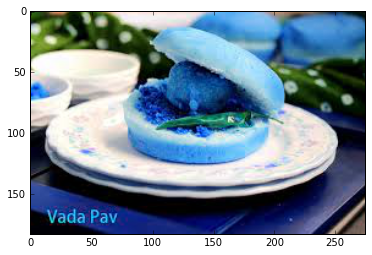

In [0]:
test_image = cv2.imread('a.jpg')
plt.imshow(test_image)

In [0]:
test_image = cv2.imread('a.jpg')
test_image = cv2.resize(test_image,(128,128))
test_image = np.array(test_image) 
test_image = test_image.astype('float32') 
test_image /= 255 
test_image= np.expand_dims(test_image, axis=0) 
print (test_image.shape)
print("DONE")

(1, 128, 128, 3)
DONE


In [0]:
print((model.predict(test_image)))
print(model.predict_classes(test_image))
print("DONE")

[[0.01998297 0.98001707]]
[1]
DONE


## Prediction
*   We have performed prediction on a brand new image (Our model havent seen this image before).
*   We have visualized the data.
*   Performed prediction.
*   Model assignes label 0 indicating that it not a "Vada_Paav".





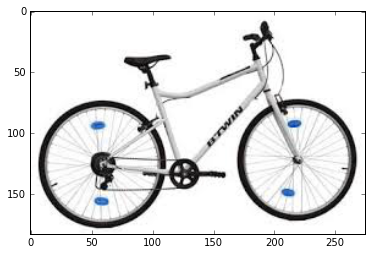

In [0]:
test_image = cv2.imread('b.jpg')
plt.imshow(test_image)

In [0]:
test_image = cv2.imread('b.jpg')
test_image = cv2.resize(test_image,(128,128))
test_image = np.array(test_image) 
test_image = test_image.astype('float32') 
test_image /= 255 
test_image= np.expand_dims(test_image, axis=0) 
print (test_image.shape)
print("DONE")

(1, 128, 128, 3)
DONE


In [0]:
print((model.predict(test_image)))
print(model.predict_classes(test_image))
print("DONE")

[[0.89085674 0.10914323]]
[0]
DONE
